In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import cohen_kappa_score



%load_ext autoreload
%autoreload 2

sns.set()

parquet_file = 'TCV_LHD_db4ML.parquet.part'
df = pd.read_parquet(parquet_file, engine ='auto')

In [3]:
#import sklearn as skl
#from sklearn import metrics

In [4]:
df['L'] = np.random.rand(len(df))
df['D'] = np.random.rand(len(df))
df['H'] = np.random.rand(len(df))

In [5]:
df.head()

time            IP        PD           FIR   WP        LDH  pulse  \
0  0.0206  30409.787109  1.816398  4.077222e+18  0.0  Ip<Ip_MIN    1.0   
1  0.0207  30882.741994  1.992211  4.092746e+18  0.0  Ip<Ip_MIN    1.0   
2  0.0208  31355.696879  2.016582  4.116485e+18  0.0  Ip<Ip_MIN    1.0   
3  0.0209  31856.508747  1.943354  4.101001e+18  0.0  Ip<Ip_MIN    1.0   
4  0.0210  32357.321558  1.860389  4.185470e+18  0.0  Ip<Ip_MIN    1.0   

          L         D         H  
0  0.905352  0.806501  0.445566  
1  0.380749  0.787070  0.380177  
2  0.065440  0.317054  0.419735  
3  0.105305  0.192155  0.231453  
4  0.231624  0.819944  0.049780

In [6]:
probability_to_category(df)

NameError: name 'probability_to_category' is not defined

In [7]:
df

time             IP         PD           FIR   WP        LDH  \
0        0.0206   30409.787109   1.816398  4.077222e+18  0.0  Ip<Ip_MIN   
1        0.0207   30882.741994   1.992211  4.092746e+18  0.0  Ip<Ip_MIN   
2        0.0208   31355.696879   2.016582  4.116485e+18  0.0  Ip<Ip_MIN   
3        0.0209   31856.508747   1.943354  4.101001e+18  0.0  Ip<Ip_MIN   
4        0.0210   32357.321558   1.860389  4.185470e+18  0.0  Ip<Ip_MIN   
...         ...            ...        ...           ...  ...        ...   
2615466  1.6630 -108659.484245  10.000000 -1.790255e+19  0.0          L   
2615467  1.6631  -86085.879530  10.000000 -1.880538e+19  0.0          L   
2615468  1.6632  -64787.943439  10.000000 -1.558623e+19  0.0  Ip<Ip_MIN   
2615469  1.6633  -45424.997785  10.000000 -1.626079e+19  0.0          L   
2615470  1.6634  -30335.058768   5.890288 -2.196298e+19  0.0          L   

         pulse         L         D         H  
0          1.0  0.905352  0.806501  0.445566  
1          1.0  0.380749  0.787070  0.380177  
2          1.0  0.065440  0.317054  0.419735  
3          1.0  0.105305  0.192155  0.231453  
4          1.0  0.231624  0.819944  0.049780  
...        ...       ...       ...       ...  
2615466  172.0  0.306163  0.916456  0.079772  
2615467  172.0  0.383675  0.543425  0.117426  
2615468  172.0  0.686647  0.930555  0.976922  
2615469  172.0  0.404360  0.926072  0.015394  
2615470  172.0  0.478606  0.031187  0.732808  

[2615471 rows x 10 columns]

In [8]:
def probability_to_category(prediction):
    prediction['prediction'] = prediction[['H','L','D']].idxmax(axis=1)

In [9]:
#Cohen's kappa coefficient (κ) is a statistic that measures inter-rater reliability for categorical sets

def cohen_kappa(df):
    return cohen_kappa_score(df['prediction'], df['target'])
 

In [10]:
cohen_kappa(df)

KeyError: 'prediction'

In [11]:
#Percentage of concordance between prediction and target

def correct_prediciton_rate(df):
    concordance = df['prediction'] == df['target']
    return 100*concordance.sum() / len(concordance)
 

In [12]:
correct_prediciton_rate(df)

KeyError: 'prediction'

In [13]:
def fourrier(df):
    for i in range(0,4):
        print(i)
        

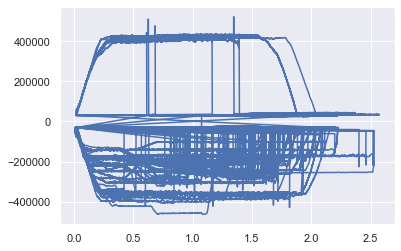

In [17]:

plt.plot(df['time'], df['IP'])
plt.show()

In [2]:
def balance_subset(samples,labels):

    number_of_L = np.sum(all_labels, axis=0)
    scale = np.floor(min(number_of_L))

    L_rows = np.where(labels[:,0]==1)
    D_rows = np.where(labels[:,1]==1)
    H_rows = np.where(labels[:,2]==1)
    
    minimum = min(len(L_rows[0]),len(D_rows[0]),len(H_rows[0]))
    
    sub_L = np.random.choice(L_rows[0] , minimum)
    sub_D = np.random.choice(D_rows[0] , minimum)
    sub_H = np.random.choice(H_rows[0] , minimum)
    
    rows=np.concatenate((sub_L, sub_D,sub_H), axis=None)
    len(rows)/3
    
    balanced_labels = all_labels[rows]
    balanced_samples = samples[rows]
    
    return balanced_labels,balanced_samples

balanced_x, balanced_y = balance_subset(all_samples,all_labels)



NameError: name 'all_samples' is not defined